<h1 style="text-align:center;">NLP With Hotel Review Part 1</h1>


## Problem statement
In this part, we will begin with some Exploratory Data Analysis (EDA), and then move into data augmentation, modelling, and iteration over model improvements.

For this part, the provided dataset of hotel reviews will be used.

This notebook is organized in the following sections:

[Part 1- Exploratory Data Analysis](#Part-1---Exploratory-Data-Analysis)<br>
[Part 1.1. Exploratory visualization](#Part-1.1.-Exploratory-visualization)<br>
[Part 2- Data Wrangling](#Part-2--Data-Wrangling)<br>


Let's begin with importing the appropriate libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from scipy import sparse

## Part 1- Exploratory Data Analysis

Let's import the dataset and take a look at it.

In [2]:
df = pd.read_csv("data/Hotel_Reviews.csv")

In [3]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### Question 1.1. 
The target column of interest is `Reviewer_Score`.

### Question 1.1.a. 
What is the shape of the dataset?

In [4]:
df.shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 515738 rows and 17 columns


### Question 1.1.b. 
The reviews provided are all given as decimal values. Convert them into integers from 1 to 10.

Rounding the 'Reviewer_Score' column to the nearest integer and converting it to an integer data type. 

In [5]:
# Round the 'Reviewer_Score' column to the nearest integer
df['Reviewer_Score'] = df['Reviewer_Score'].round()

# Convert 'Reviewer_Score' to integer data type
df['Reviewer_Score'] = df['Reviewer_Score'].astype(int)

In [6]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### Question 1.1.c. 
The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?

I would expect the distribution of scores in a review dataset where ratings range from 1 to 10 to be somewhat evenly spread across the possible score values. However, the actual distribution may vary depending on the dataset and other factors. It is possible to observe a skewed distribution with a higher concentration of scores towards the higher or lower end of the rating scale. Various factors, such as the quality of the reviewed hotels or reviewer biases, can influence the distribution.

To determine the distribution of reviews in the dataset, we can analyze the frequency of each score value by creating a histogram or counting the occurrences of each score. 

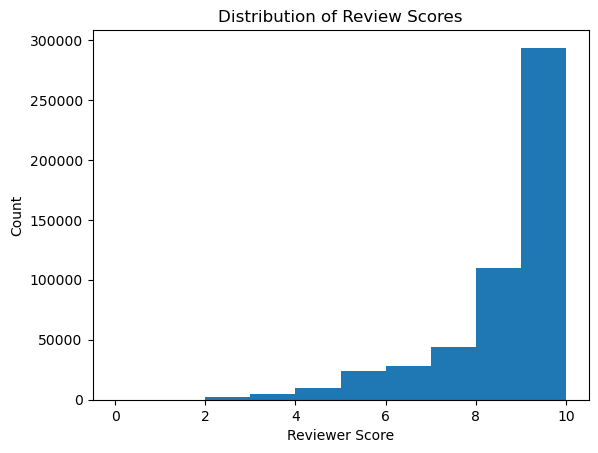

In [7]:
# Explore the distribution of review scores
plt.hist(df['Reviewer_Score'], range=(0, 10))
plt.xlabel('Reviewer Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')
plt.show()

In [8]:
df['Reviewer_Score'].value_counts()

Reviewer_Score
10    187744
8     110155
9     105722
7      44088
6      27800
5      24188
4       9436
3       4406
2       2199
Name: count, dtype: int64

The distribution of review scores appears to be skewed to the left meaning that the higher scores of 8, 9, and 10 have a higher frequency, indicating a larger proportion of positive reviews. As we move towards the lower scores, the frequency decreases gradually. This asymmetry suggests that there are fewer reviews with lower scores, indicating a lower proportion of negative or less satisfactory experiences.

Therefore, the left-skewed distribution suggests that the majority of reviewers had positive experiences with the hotels, resulting in a higher concentration of scores towards the higher end of the rating scale.

### Question 1.1.d. 
Given this will be a classification problem, what is a potential problem with this distribution?

One important aspect to consider when analyzing the distribution of review scores is the presence of class imbalance. Class imbalance refers to a situation where the distribution of target classes in a classification problem is skewed, with one class being more dominant than others.

In the provided dataset, we can observe an uneven distribution of review scores. Higher scores such as 8, 9, and 10 have a significantly larger number of reviews compared to lower scores like 2, 3, and 4. This class imbalance poses potential challenges when developing a classification model as it can introduce bias towards the more prevalent class.

The presence of class imbalance can impact the performance of the model, particularly for the minority class. Common evaluation metrics like accuracy, precision, and recall may be influenced by the larger number of positive reviews, potentially leading to biased predictions.

To address this issue, it's important to employ appropriate strategies to handle class imbalance, such as oversampling or undersampling techniques, using different evaluation metrics, or grouping some of the minor classes to make a class with higher number of samples. In this case, the reviews can be grouped into good and bad with a cut-off score such as 7, 8 or 9. By applying these techniques, we aim  to ensure that the model is trained and evaluated in a balanced manner.

### Question 1.2. 
This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

In total there are 17 columns in this dataset. The data.info() shows a good overview of columns and their data types.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Using df.describe(), numerical columns and basic statistics of the data they include can be presented. As can be seen, there are 9 numeric columns including:

- Additional_Number_of_Scoring
- Average_Score	
- Review_Total_Negative_Word_Counts	
- Total_Number_of_Reviews	
- Review_Total_Positive_Word_Counts	
- Total_Number_of_Reviews_Reviewer_Has_Given	
- Reviewer_Score
- lat
- lng

It can be observed that the meidan value for `Reviewer_Score` is 8.8, although the min value is 2.5. This, again shows that the target column is highly skewed to the right.

Also, regarding the `Review_Total_Negative_Word_Counts` and `Review_Total_Positive_Word_Counts` it can be seen that the median values are 9 and 11, respectively. However, there are some outliers in the datset with very long rviews such as 408 and 395 words for negative and positive reviews as the max values.

In [10]:
# Calculate basic statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Additional_Number_of_Scoring,515738.0,498.081836,500.538467,1.000000,169.000000,341.000000,660.000000,2682.000000
Average_Score,515738.0,8.397487,0.548048,5.200000,8.100000,8.400000,8.800000,9.800000
Review_Total_Negative_Word_Counts,515738.0,18.539450,29.690831,0.000000,2.000000,9.000000,23.000000,408.000000
Total_Number_of_Reviews,515738.0,2743.743944,2317.464868,43.000000,1161.000000,2134.000000,3613.000000,16670.000000
Review_Total_Positive_Word_Counts,515738.0,17.776458,21.804185,0.000000,5.000000,11.000000,22.000000,395.000000
Total_Number_of_Reviews_Reviewer_Has_Given,515738.0,7.166001,11.040228,1.000000,1.000000,3.000000,8.000000,355.000000
Reviewer_Score,515738.0,8.457577,1.683671,2.000000,8.000000,9.000000,10.000000,10.000000
lat,512470.0,49.442439,3.466325,41.328376,48.214662,51.499981,51.516288,52.400181
lng,512470.0,2.823803,4.579425,-0.369758,-0.143372,0.010607,4.834443,16.429233


By using df.describe(include=object), the non-numeric columns of the datset can be identified. These columns are:
- Hotel_Address
- Review_Date
- Hotel_Name
- Reviewer_Nationality
- Negative_Review
- Positive_Review
- Tags
- days_since_review

Also, some charactersitics of the dataset columns will be presented. These include counts of instances in each column, number of unique instances, the most frequent instance (top) and its frequency. 

In [11]:
# Calculate basic statistics of non-numerical columns
df.describe(include=object).T

,count,unique,top,freq
Hotel_Address,515738,1493,163 Marsh Wall Docklands Tower Hamlets London ...,4789
Review_Date,515738,731,8/2/2017,2585
Hotel_Name,515738,1492,Britannia International Hotel Canary Wharf,4789
Reviewer_Nationality,515738,227,United Kingdom,245246
Negative_Review,515738,330011,No Negative,127890
Positive_Review,515738,412601,No Positive,35946
Tags,515738,55242,"[' Leisure trip ', ' Couple ', ' Double Room '...",5101
days_since_review,515738,731,1 days,2585


- From the `Review_Date`, the year, month and day can be extracted and added to the columns.
- The `days_since_review` can be converted to the numeric column if the `days` in the values gets removed. However, since this column only contains "Duration between the review date and scrape date", doesn't contain much valuable information and I would drop it later.
- The `Negative_Review` and `Positive_Review` columns can be turned into sparse matrixes, all numeric.
- The country can be extracted from the `Hotel_Name` column and added to the dataframe as a separate column. Then having the `Reviewer_Nationality`, another binary numeric column can be added as `is_tourist`. Then, if the country of the Hotel and `Reviewer_Nationality` are different the value would be 1 otherwise 0. 

**Notice:**

Converting columns to the numeric ones will be done in this section instead of **3.b**. This is because some EDA will be done before jumping to the `Data Wrangling` section. This helps to better understand the datset I am dealing with and get some meaningful insights from the data before going to the next section.

In the sections below, I will go to some preprocessing and EDA along with converting non-numeric columns.

**Duplicated rows**

In [12]:
# Check for duplicated rows in the DataFrame
duplicated_rows = df.duplicated()

# Sum the number of True values in the duplicated_rows Series
num_duplicates = duplicated_rows.sum()

# Print the total count of duplicated rows
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 526


In [13]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [14]:
# Check
num_duplicates_after = df.duplicated().sum()

# Print the total count of duplicated rows
print("Number of duplicated rows:", num_duplicates_after)

Number of duplicated rows: 0


**Duplicated columns**

In [15]:
df.T.duplicated()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                           False
lng                                           False
dtype: bool

As expected there is no duplicated columns.

**Missing values**

In [16]:
# How many values are actually missing?
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [17]:
# Percentage of missing values in each column
df.isna().sum()/df.shape[0]*100.0

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.634302
lng                                           0.634302
dtype: float64

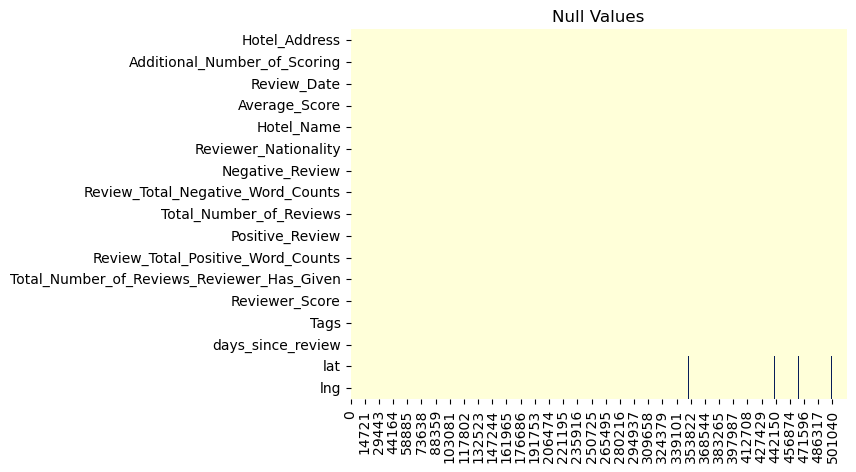

In [18]:
# Create a mask to identify null values
null_mask = df.isnull().T

# Use a heatmap to visualize the null values
sns.heatmap(null_mask, cmap='YlGnBu', cbar=False)

# Set plot title and show the plot
plt.title('Null Values')
plt.show()

There are 3268 rows with null values for `Lat` and `lng` columns. The heatmap shows that these values are not spread throughout the dataset and may be coming from limited locations. Although, the null values consist of only about 0.63% of the total row numbers, I will try to replace them with the appropriate values.  

First, let's see how many hotels are there without `lat` and `lng`.

In [22]:
# Find unique hotels with NaN values in 'lat' and 'lng' columns
nan_hotels = df[df['lat'].isna() | df['lng'].isna()]['Hotel_Name'].unique()
print(f"There are {len(nan_hotels)} hotels without lat and lng values")

There are 17 hotels without lat and lng values


In [23]:
# Get the value counts of these hotels
df[df['lat'].isna() | df['lng'].isna()]['Hotel_Name'].value_counts()

Hotel_Name
Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28
Name: count, dtype: int64

In [24]:
# Find unique hotel addresses with NaN values in 'lat' and 'lng' columns
nan_addresses = df[df['lat'].isna() | df['lng'].isna()]['Hotel_Address'].unique()

# Print the unique hotel addresses
for address in nan_addresses:
    print(address)

20 Rue De La Ga t 14th arr 75014 Paris France
23 Rue Damr mont 18th arr 75018 Paris France
4 rue de la P pini re 8th arr 75008 Paris France
Bail n 4 6 Eixample 08010 Barcelona Spain
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria
Hasenauerstra e 12 19 D bling 1190 Vienna Austria
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria
Paragonstra e 1 11 Simmering 1110 Vienna Austria
Pau Clar s 122 Eixample 08009 Barcelona Spain
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria
Sep lveda 180 Eixample 08011 Barcelona Spain
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria


As can be seen, the addresses for these hotels are not correctly entered. This makes it hard to use automatic lat and lng finders like `geopy` library. Therefore, the coordinates of these hotels were found manually by google map and will be replaced by the null values.

In [25]:
lat_lng = {
           'Mercure Paris Gare Montparnasse': [48.84000670428329, 2.3235617313564703],
           'Holiday Inn Paris Montmartre': [48.88892086294269, 2.333153750965061],
           'Maison Albar Hotel Paris Op ra Diamond': [48.87534549673995, 2.323370539234422],
           'NH Collection Barcelona Podium': [41.39170894840179, 2.1779154541409396],
           'City Hotel Deutschmeister': [48.220959094233756, 16.36663295453844],
           'Hotel Park Villa': [48.23360764289741, 16.345946464876274],
           'Fleming s Selection Hotel Wien City': [48.2095090182133, 16.353509969882246],
           'Cordial Theaterhotel Wien': [48.20970616626686, 16.351409652684776],
           'Hotel Daniel Vienna': [48.18891490865316, 16.38374711035578],
           'Roomz Vienna': [48.18715043138497, 16.421434918972498],
           'Renaissance Barcelona Hotel': [41.392894137794876, 2.1679018517670023],
           'Austria Trend Hotel Schloss Wilhelminenberg Wien': [48.21969804202638, 16.285559910357676],
           'Hotel Advance': [41.38397908601401, 2.163078346033606],
           'Derag Livinghotel Kaiser Franz Joseph Vienna': [48.24603016524865, 16.34180015083407],
           'Hotel City Central': [48.21440058164121, 16.380008902793595],
           'Hotel Pension Baron am Schottentor': [48.21694969524534, 16.360313392638936],
           'Hotel Atlanta': [48.22052474341073, 16.355861512210655]            
           }

In [26]:
# Iterate over the DataFrame
for index, row in df.iterrows():
    hotel_name = row['Hotel_Name']
    if hotel_name in lat_lng:
        # Replace NaN values with lat and lng from the dictionary
        df.loc[index, 'lat'] = lat_lng[hotel_name][0]
        df.loc[index, 'lng'] = lat_lng[hotel_name][1]

In [27]:
# Check
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

The null values in the `lat` and `lng` columns were replaced by the appropriate coordinates. Now that the misssing values and duplicates have been treated in our dataset, we can move forward to some exploratory visualization.

## Part 1.1. Exploratory visualization
The goal in this section is to obtain some insights from our dataset with the help of visualization. I will go through columns and try to extract as much as information possible from the object columns.

**Hotel_Name**


Let's see the top 10 hotels with the highest average scores by reviewers and total number of reviews.

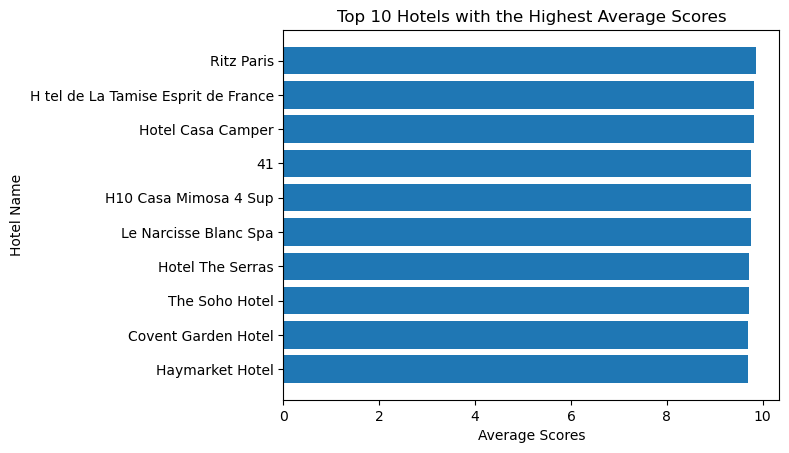

In [28]:
# Examine the average scores of different hotels
average_scores = df.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False)

# Visualize the top 10 hotels with the highest average scores
top_10_hotels_scores = average_scores.head(10)
plt.barh(top_10_hotels_scores.index, top_10_hotels_scores.values)
plt.xlabel('Average Scores')
plt.ylabel('Hotel Name')
plt.title('Top 10 Hotels with the Highest Average Scores')
plt.gca().invert_yaxis()
plt.show()

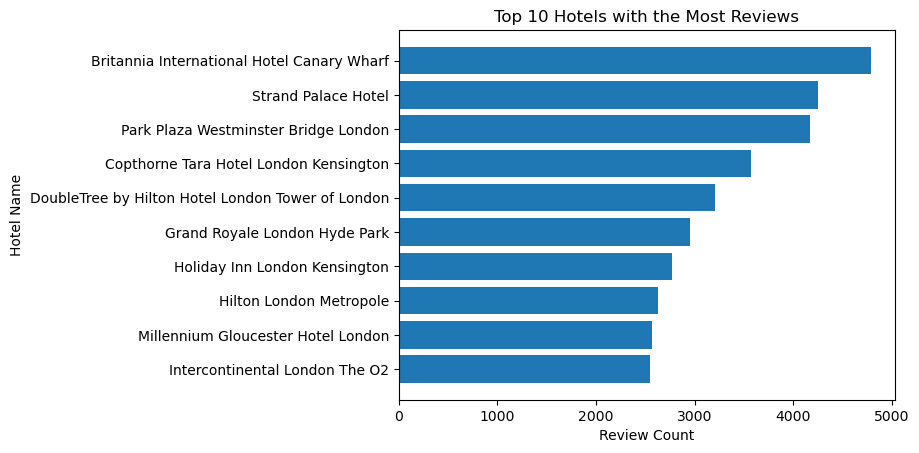

In [29]:
# Calculate the total number of reviews for each hotel
review_counts = df['Hotel_Name'].value_counts()

# Visualize the top 10 hotels with the most reviews
top_10_hotels = review_counts.head(10)
plt.barh(top_10_hotels.index, top_10_hotels.values)
plt.xlabel('Review Count')
plt.ylabel('Hotel Name')
plt.title('Top 10 Hotels with the Most Reviews')
plt.gca().invert_yaxis()
plt.show()

There is also another column in the dataset `Additional_Number_of_Scoring`: which means that there are also some guests who just made a scoring on the service rather than a review. Let's consider these values to each hotel and se if the order changes. 

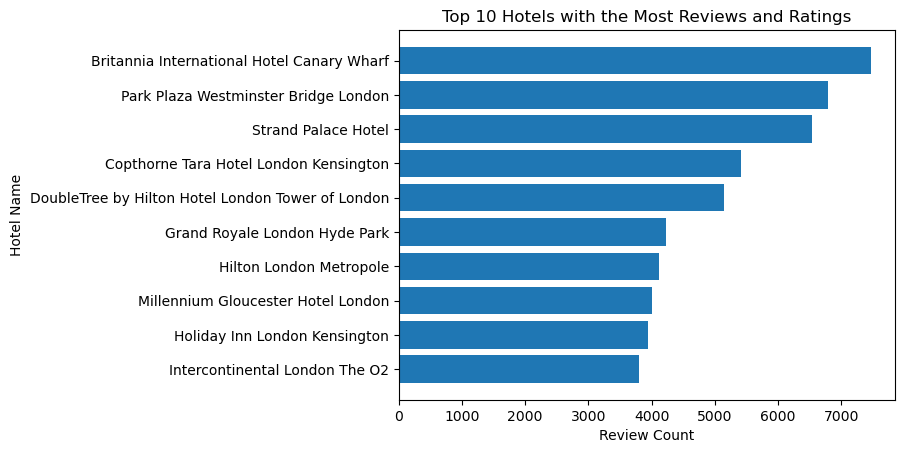

In [30]:
# Calculate the total number of reviews for each hotel considering only ratings as well
review_counts_total = df['Hotel_Name'].value_counts() + df.groupby('Hotel_Name')['Additional_Number_of_Scoring'].first()

# Visualize the top 10 hotels with the most reviews and ratings
top_10_hotels_total = review_counts_total.sort_values(ascending=False).head(10)
plt.barh(top_10_hotels_total.index, top_10_hotels_total.values)
plt.xlabel('Review Count')
plt.ylabel('Hotel Name')
plt.title('Top 10 Hotels with the Most Reviews and Ratings')
plt.gca().invert_yaxis()
plt.show()

It seems that there is a slight change in the order but the overall the top 10 do not change.

**Hotel_Address**

The `Hotel_Address` column contains some valuable information like the country of each hotel. 

For instance: 
20 Rue De La Ga t 14th arr 75014 Paris France

It can be seen that the last word of the address is the country of the hotel. This will be used to extract the country of each hotel.


In [31]:
# Extract the country from the address
df['Hotel_Country'] = df['Hotel_Address'].str.split().str[-1]

In [32]:
# Value counts for the countries
df['Hotel_Country'].value_counts()

Hotel_Country
Kingdom        262298
Spain           60149
France          59413
Netherlands     57211
Austria         38937
Italy           37204
Name: count, dtype: int64

Since United Kingdom is two words, only the Kingdom has been extracted. This will be corrected in the following line of code.

In [33]:
# Replace "Kingdom" with "United Kingdom"
df['Hotel_Country'] = df['Hotel_Country'].replace('Kingdom', 'United Kingdom')

Now the number of hotels per each country will be plotted. 

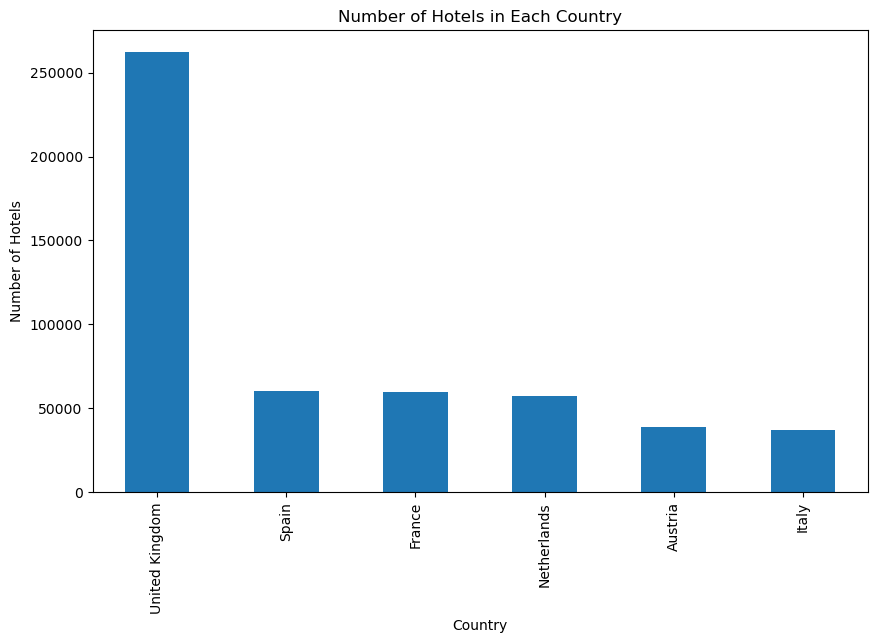

In [34]:
# Count the number of hotels in each country
country_counts = df['Hotel_Country'].value_counts()

# Plot the number of hotels in each country
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Hotels')
plt.title('Number of Hotels in Each Country')
plt.xticks(rotation=90)
plt.show()

This shows that UK has the highest number of visits from its hotels. In other words, the plot above does not show the unique number of hotels in each country. To plot this, the following line of codes will be executed.

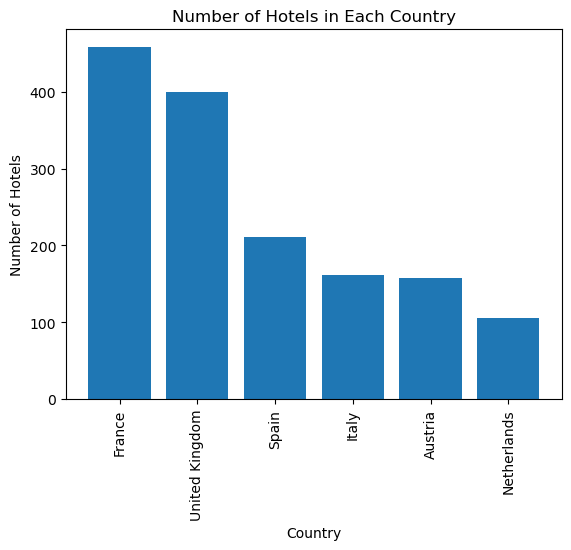

In [35]:
unique_hotels_by_country = df.groupby('Hotel_Country')['Hotel_Name'].nunique().sort_values(ascending=False)

plt.bar(unique_hotels_by_country.index, unique_hotels_by_country.values)
plt.xlabel('Country')
plt.ylabel('Number of Hotels')
plt.title('Number of Hotels in Each Country')
plt.xticks(rotation=90)
plt.show()

Now, it can be seen that while France has more hotels than UK, the number of visits from hotels in UK have been much higher than France.

**Is_Tourist**

Now that the country of the hotels are identified, having the `Reviewer_Nationality` column, another column can be created as `Is_Tourist`. This column will have binary values of 0 and 1. When the `Hotel_Country` is not equal to the `Reviewer_Nationality`, then the value would be 1 indicating the traveller was a tourist otherwise 0. This may help in the modelling process where the review score of the revieewer may depend on whether the reviewer has been a tourist or a local visiting the hotel. 

Let's create this column. The comparison would be more accurate by converting the values to lowercase and removing leading/trailing whitespaces in both columns.

In [36]:
# Create the is_tourist column
df['Reviewer_Nationality'] = df['Reviewer_Nationality'].str.lower().str.strip()
df['Hotel_Country'] = df['Hotel_Country'].str.lower().str.strip()

df['Is_Tourist'] = (df['Reviewer_Nationality'] != df['Hotel_Country']).astype(int)


In [37]:
df['Is_Tourist'].value_counts()

Is_Tourist
1    336842
0    178370
Name: count, dtype: int64

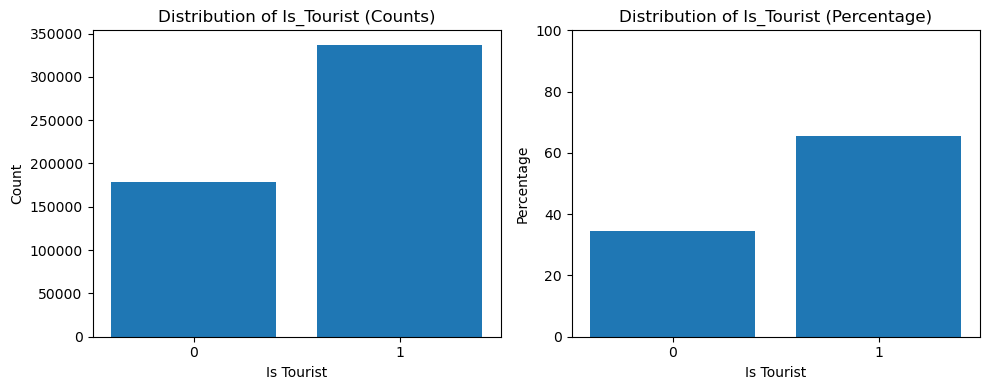

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot for counts
is_tourist_counts = df['Is_Tourist'].value_counts()
axes[0].bar(is_tourist_counts.index, is_tourist_counts.values)
axes[0].set_xlabel('Is Tourist')
axes[0].set_ylabel('Count')
axes[0].set_xticks(is_tourist_counts.index)
axes[0].set_title('Distribution of Is_Tourist (Counts)')

# Plot for percentages
percentages = (is_tourist_counts / len(df)) * 100
axes[1].bar(is_tourist_counts.index, percentages)
axes[1].set_xlabel('Is Tourist')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Distribution of Is_Tourist (Percentage)')
axes[1].set_xticks(is_tourist_counts.index)
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()


As can be seen in the plots above, most of the visits have been done by tourists, around 65% to 35%. This may help in the modelling process of the classification.

**Reviewer_Nationality**

Let's check the reviewer nationality distribution in our dataset. The plot below will show the most common reviewer nationalities.

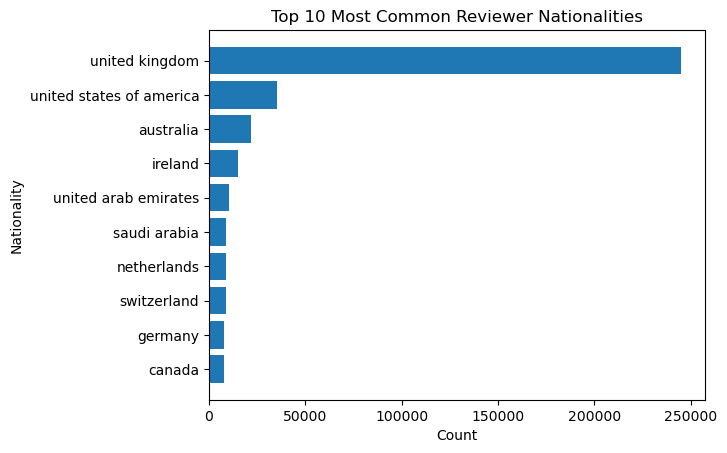

In [39]:
top_nationalities = df['Reviewer_Nationality'].value_counts().head(10)

plt.barh(top_nationalities.index, top_nationalities.values)
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.title('Top 10 Most Common Reviewer Nationalities')
plt.gca().invert_yaxis()
plt.show()

UK by far has the highest number of reviewers followed by US and Australia.

**Review_Date**

The `Review_Date` column as another object type column can be converted to the DateTime and then the year, month and day could be extracted and created as separate columns.

In [40]:
# Convert 'Review_Date' column to datetime format
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Extract year and month from 'Review_Date'
df['Year'] = df['Review_Date'].dt.year
df['Month'] = df['Review_Date'].dt.month
df['Day'] = df['Review_Date'].dt.day

Then the monthly review counts can be plotted to see any seasonality between the number of reviews and the time of the year.

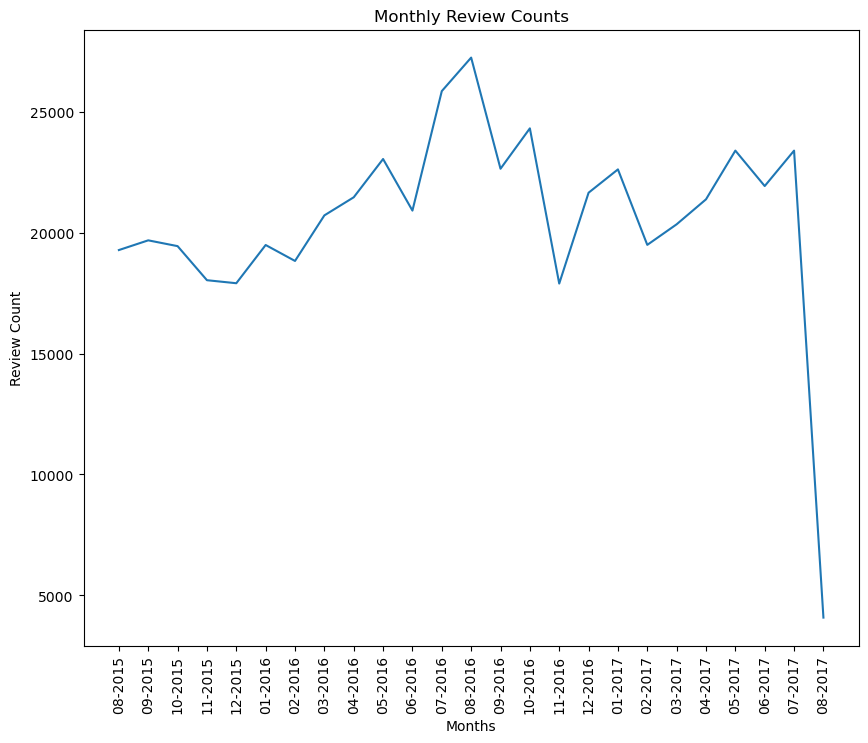

In [41]:
# Count the number of reviews per year and month
monthly_reviews = df.groupby(['Year', 'Month']).size().reset_index(name='Review_Count')

# Create a new column for formatted date labels
monthly_reviews['Formatted_Date'] = monthly_reviews.apply(lambda row: f"{row['Month']:02d}-{row['Year']}", axis=1)

# Plot the monthly review counts with formatted date labels
plt.figure(figsize=(10,8))
plt.plot(monthly_reviews['Review_Count'])
plt.xlabel('Months')
plt.ylabel('Review Count')
plt.title('Monthly Review Counts')
plt.xticks(range(len(monthly_reviews)), monthly_reviews['Formatted_Date'], rotation=90)
plt.show()

As expected, it seems that the number of reviews increases in the summer and declines after September and increases again around New Year. The fall in August 2017 may be related to the collection of the data at the beginning of the month rather than end of the month.

Also, let's see how the average scores by the reviewers change by time of the year.

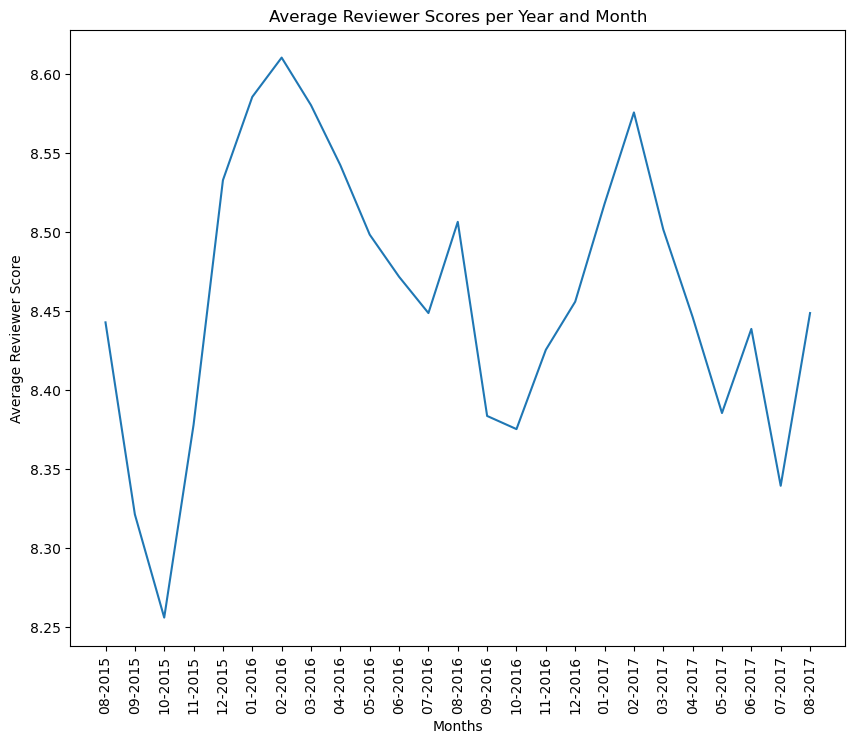

In [42]:
# Convert the 'Month' column to integers
df['Month'] = df['Month'].astype(int)

# Calculate the average reviewer scores per year and month
average_scores = df.groupby(['Year', 'Month'])['Reviewer_Score'].mean().reset_index()

# Create a new column for formatted date labels
average_scores['Formatted_Date'] = average_scores.apply(lambda row: f"{int(row['Month']):02d}-{int(row['Year'])}", axis=1)

# Plot the average reviewer scores with formatted date labels
plt.figure(figsize=(10, 8))
plt.plot(average_scores['Reviewer_Score'])
plt.xlabel('Months')
plt.ylabel('Average Reviewer Score')
plt.title('Average Reviewer Scores per Year and Month')
plt.xticks(range(len(average_scores)), average_scores['Formatted_Date'], rotation=90)
plt.show()


It can be observed that average scores are typically higher in around January and February and lower in the high season months (summer months).

**Correlation**

Before going to the next section, let's see the correlation heatmap between the numeric columns.

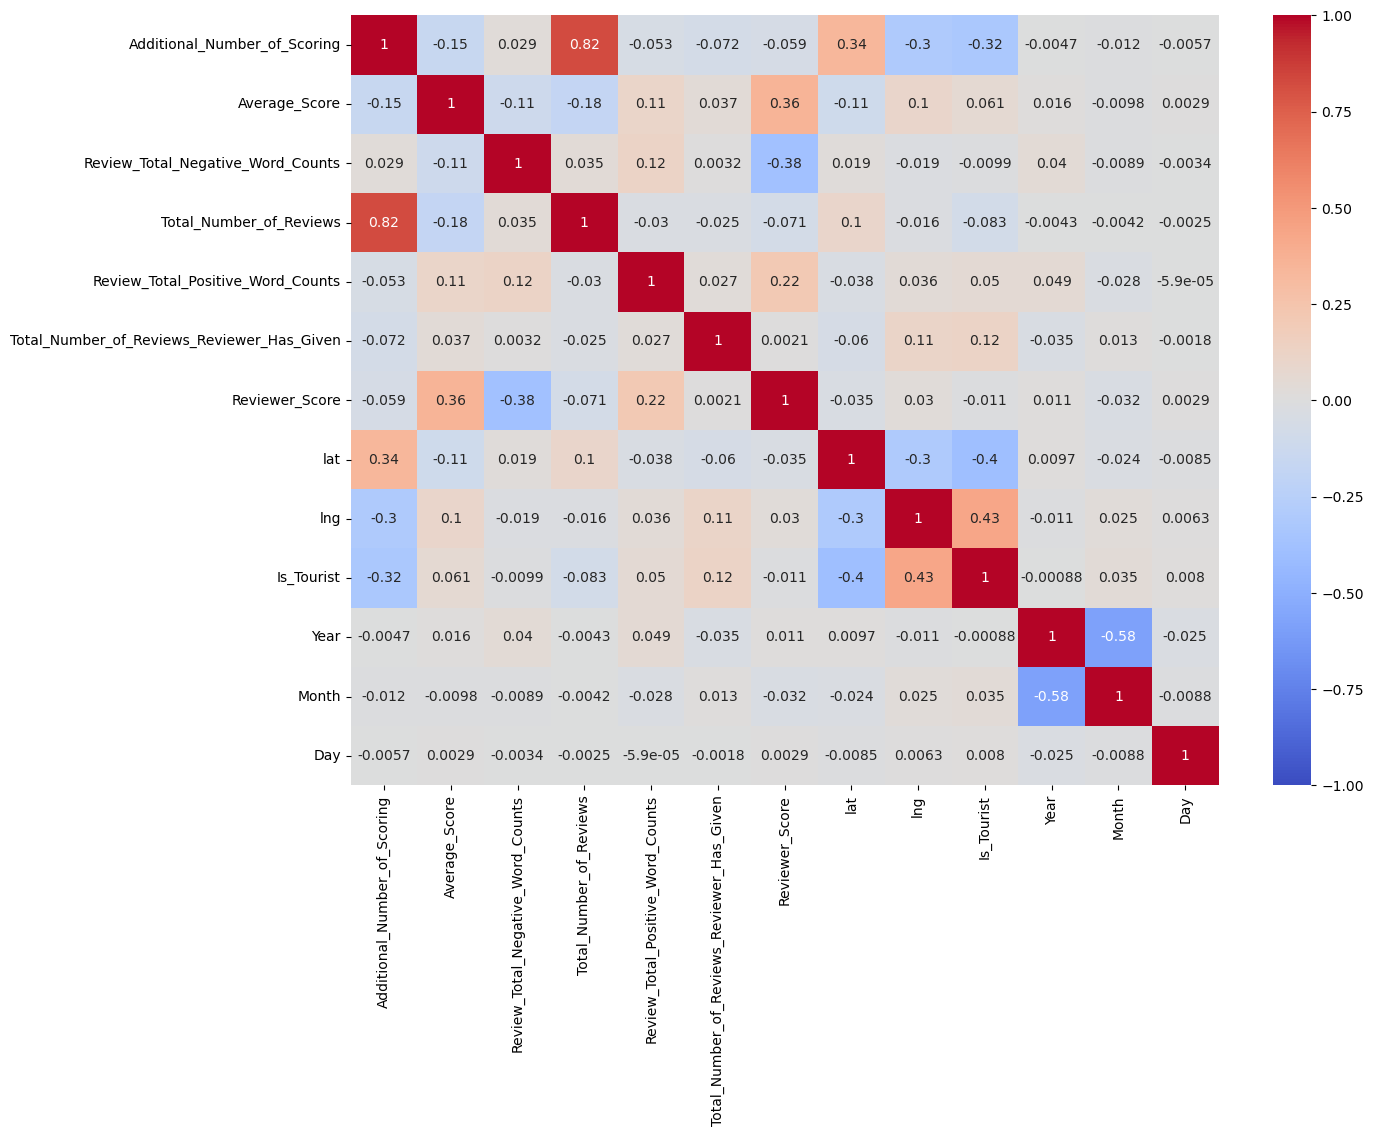

In [43]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmax=1.0, vmin=-1.0, center=0)
plt.show()

It is observed that the reveiwer score is possitively correlated with the average score of the hotel and `Review_Total_Positive_Word_Counts` and negatively correlated with the `Review_Total_Negative_Word_Counts`.

Also `Is_Tourist` is positively correlated with `lng` meaning that there are more tourist travellers in the eastern countries of europe (e.g., Austria).

## Part 2- Data Wrangling

### Question 3. 
Build the proper dataset separation (Optional but recommended: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)

Using stratify method, the subsample datset will be created with 10% of data.

In [44]:
# Split the data into a subsample with all classes included
df_sub = train_test_split(df, stratify=df['Reviewer_Score'], train_size=0.1, random_state=42)[0]
df_sub.reset_index(inplace=True, drop=True)

In [45]:
df_sub.shape
print(f"The subsample dataset has {df_sub.shape[0]} rows and {df_sub.shape[1]} columns")

The subsample dataset has 51521 rows and 22 columns


### Question 3.a. 
Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

In [46]:
# Convert the Reveiwer_Score column into binary column with the above criteria
df_sub['Reviewer_Score'] = df_sub['Reviewer_Score'].apply(lambda score: 1 if score >= 9 else 0)

In [47]:
df_sub['Reviewer_Score'].value_counts()

Reviewer_Score
1    29321
0    22200
Name: count, dtype: int64

The distribution of the target value is much better now for the classification objective.

### Question 3.b. 
Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.

Let's check our data once more:

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515212 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515212 non-null  object        
 1   Additional_Number_of_Scoring                515212 non-null  int64         
 2   Review_Date                                 515212 non-null  datetime64[ns]
 3   Average_Score                               515212 non-null  float64       
 4   Hotel_Name                                  515212 non-null  object        
 5   Reviewer_Nationality                        515212 non-null  object        
 6   Negative_Review                             515212 non-null  object        
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64         
 8   Total_Number_of_Reviews                     515212 non-null  int64         
 9 

- Until here, the required information from `Hotel_Address` was extracted. 
- The `Review_Date` was converted to `Year`, `Month` and `Day` columns. 
- `Hotel_Name` and `days_since_review` can be dropped since no useful information can be drawn for modelling process. 
- The `Reviewer_Nationality` was used for the `Is_Tourist` column and can be dropped.  

Let's drop these column first.

In [49]:
columns_to_drop = ['Hotel_Address', 'Review_Date', 'Hotel_Name', 'days_since_review', 'Reviewer_Nationality']
df_sub.drop(columns=columns_to_drop, inplace=True)

In [50]:
# Check
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51521 entries, 0 to 51520
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                51521 non-null  int64  
 1   Average_Score                               51521 non-null  float64
 2   Negative_Review                             51521 non-null  object 
 3   Review_Total_Negative_Word_Counts           51521 non-null  int64  
 4   Total_Number_of_Reviews                     51521 non-null  int64  
 5   Positive_Review                             51521 non-null  object 
 6   Review_Total_Positive_Word_Counts           51521 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  51521 non-null  int64  
 8   Reviewer_Score                              51521 non-null  int64  
 9   Tags                                        51521 non-null  object 
 10  lat       

In [51]:
# Getting the object columns
object_columns = df_sub.select_dtypes(include=['object'])
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51521 entries, 0 to 51520
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Negative_Review  51521 non-null  object
 1   Positive_Review  51521 non-null  object
 2   Tags             51521 non-null  object
 3   Hotel_Country    51521 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


- From the table above, the `Negative_Review` and `Positive_Review` should be remained. 
- The `Hotel_Country` can be converted to dummy variables.
- For the `Tags`, as it includes a lot of useful information, some of the most important tags will be selected and extracted.

First, the `Hotel_Country` will be converted to the dummy variables and then dropped.

In [52]:
# Convert 'Hotel_Country' column into dummy variables with binary values
country_dummies = pd.get_dummies(df_sub['Hotel_Country'], dtype=int, prefix='Country', drop_first=True)

# Concatenate the DataFrame with the dummy variable columns
df_sub = pd.concat([df_sub, country_dummies], axis=1)

In [53]:
df_sub.drop(columns='Hotel_Country', inplace=True)

In [54]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51521 entries, 0 to 51520
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                51521 non-null  int64  
 1   Average_Score                               51521 non-null  float64
 2   Negative_Review                             51521 non-null  object 
 3   Review_Total_Negative_Word_Counts           51521 non-null  int64  
 4   Total_Number_of_Reviews                     51521 non-null  int64  
 5   Positive_Review                             51521 non-null  object 
 6   Review_Total_Positive_Word_Counts           51521 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  51521 non-null  int64  
 8   Reviewer_Score                              51521 non-null  int64  
 9   Tags                                        51521 non-null  object 
 10  lat       

**`Tags`**

First, I will select the unique tags and see what information they store.

In [55]:
# Identify unique tags in the 'Tags' column
unique_tags = df_sub['Tags'].unique()
unique_tags[0:10]

array(["[' Leisure trip ', ' Couple ', ' Double Hilton Deluxe ', ' Stayed 2 nights ']",
       "[' Leisure trip ', ' Group ', ' Double or Twin Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Couple ', ' Superior ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Family with older children ', ' Queen Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Couple ', ' Superior Plus Room ', ' Stayed 4 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Family with young children ', ' Superior Queen Room ', ' Stayed 6 nights ', ' Submitted from a mobile device ']",
       "[' Business trip ', ' Solo traveler ', ' Deluxe Double Room ', ' Stayed 2 nights ']",
       "[' Leisure trip ', ' Solo traveler ', ' Triple Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Family with young children '

From the tags above, these were selected:

'Leisure trip', 'Business trip', 'Solo traveler', 'Family with young children', 'Couple'

This is because they contain important information about type of travel and family style which are highly important criteria for most of the people.

In [56]:
# Tags to extract
tags_to_extract = ['Leisure trip', 'Business trip', 'Solo traveler', 'Family with young children', 'Couple']

# Create new columns for the extracted tags
for tag in tags_to_extract:
    df_sub[tag] = df_sub['Tags'].apply(lambda x: 1 if tag in x else 0)

In [57]:
df_sub.drop(columns='Tags', inplace=True)

In [58]:
df_sub.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,...,Country_france,Country_italy,Country_netherlands,Country_spain,Country_united kingdom,Leisure trip,Business trip,Solo traveler,Family with young children,Couple
0,429,8.6,The price for breakfast is expensive when you...,24,1462,Nice comfortable room excellent staff and the...,43,2,1,51.536091,...,0,0,0,0,1,1,0,0,0,1
1,315,9.3,No Negative,0,2757,The upgrade to my room was awsome,8,8,0,41.386146,...,0,0,0,1,0,1,0,0,0,0
2,1100,9.1,Nothing,2,3611,Incredible hotel amazing views the most comfo...,12,1,1,51.508404,...,0,0,0,0,1,1,0,0,0,1
3,123,8.6,We spilled something on the carpet and when w...,49,629,This hotel is in a good neighborhood with Glo...,31,2,0,51.494552,...,0,0,0,0,1,1,0,0,0,0
4,495,8.5,No Negative,0,2300,Staff and concierge extremely helpful,6,4,1,51.516517,...,0,0,0,0,1,1,0,0,0,1


Now, everything should be fine! Let's check the dataframe again.

In [59]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51521 entries, 0 to 51520
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                51521 non-null  int64  
 1   Average_Score                               51521 non-null  float64
 2   Negative_Review                             51521 non-null  object 
 3   Review_Total_Negative_Word_Counts           51521 non-null  int64  
 4   Total_Number_of_Reviews                     51521 non-null  int64  
 5   Positive_Review                             51521 non-null  object 
 6   Review_Total_Positive_Word_Counts           51521 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  51521 non-null  int64  
 8   Reviewer_Score                              51521 non-null  int64  
 9   lat                                         51521 non-null  float64
 10  lng       

In [60]:
# Getting the object columns
object_columns = df_sub.select_dtypes(include=['object'])
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51521 entries, 0 to 51520
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Negative_Review  51521 non-null  object
 1   Positive_Review  51521 non-null  object
dtypes: object(2)
memory usage: 805.1+ KB


Only two object columns have remained which are: `Negative_Review` and `Negative_Review`.
These should be remianed for the NLP process.

### Question 3.c. 
Split the data into train and test sets.

First the X and y should be identified. X is the df_sub excluding `Reviewer_Score` and y is the `Reviewer_Score`.

In [61]:
X = df_sub.drop('Reviewer_Score', axis=1)
y = df_sub['Reviewer_Score']

In [62]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

In [63]:
print(f"Shapes:\nX_train: {X_train.shape}\n X_test: {X_test.shape}\n y_train: {y_train.shape}\n y_test: {y_test.shape}")

Shapes:
X_train: (41216, 24)
 X_test: (10305, 24)
 y_train: (41216,)
 y_test: (10305,)


### Question 3.d.
Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.

To do this, first I will try some different values for min_df and try to see the dimension of the X_train_transformed.

In [64]:
# Example list of min_df values to iterate over
min_df_values = [1, 2, 5, 7, 10, 15, 20, 25]  

for min_df in min_df_values:
    bagofwords = CountVectorizer(stop_words="english", min_df=min_df)
    bagofwords.fit(X_train['Positive_Review'])
    X_train_transformed = bagofwords.transform(X_train['Positive_Review'])
    print(f"min_df={min_df}, X_train_transformed.shape={X_train_transformed.shape}")

min_df=1, X_train_transformed.shape=(41216, 13774)
min_df=2, X_train_transformed.shape=(41216, 6666)
min_df=5, X_train_transformed.shape=(41216, 3535)
min_df=7, X_train_transformed.shape=(41216, 2894)
min_df=10, X_train_transformed.shape=(41216, 2318)
min_df=15, X_train_transformed.shape=(41216, 1811)
min_df=20, X_train_transformed.shape=(41216, 1503)
min_df=25, X_train_transformed.shape=(41216, 1309)


While setting `min_df` without seeing the erformance of the model is hard, I will go with min_df=20. I have selected this value since the shape of X_train_transformed will be substantially reduced compared to the lower `min_df` values. This could be helpful to improve memory or computational efficiency and overfitting prevention. By setting a higher min_df, we prioritize more frequent terms that are likely to be more general and representative.

Now, let's see the effect of `min_df` for `Negative_Review`.

In [65]:
# Example list of min_df values to iterate over
min_df_values = [1, 2, 5, 7, 10, 15, 20, 25]  

for min_df in min_df_values:
    bagofwords = CountVectorizer(stop_words="english", min_df=min_df)
    bagofwords.fit(X_train['Negative_Review'])
    X_train_transformed = bagofwords.transform(X_train['Negative_Review'])
    print(f"min_df={min_df}, X_train_transformed.shape={X_train_transformed.shape}")

min_df=1, X_train_transformed.shape=(41216, 15711)
min_df=2, X_train_transformed.shape=(41216, 8068)
min_df=5, X_train_transformed.shape=(41216, 4564)
min_df=7, X_train_transformed.shape=(41216, 3701)
min_df=10, X_train_transformed.shape=(41216, 2938)
min_df=15, X_train_transformed.shape=(41216, 2290)
min_df=20, X_train_transformed.shape=(41216, 1894)
min_df=25, X_train_transformed.shape=(41216, 1633)


Again, I will select `min_df`=20 for the same reasons mentioned above.

Now, let's see the top 20 frequent words for the positive and negative reviews.

In [66]:
bagofwords = CountVectorizer(stop_words="english", min_df=20)
bagofwords.fit(X_train['Positive_Review'])

X_train_transformed = bagofwords.transform(X_train['Positive_Review']) 

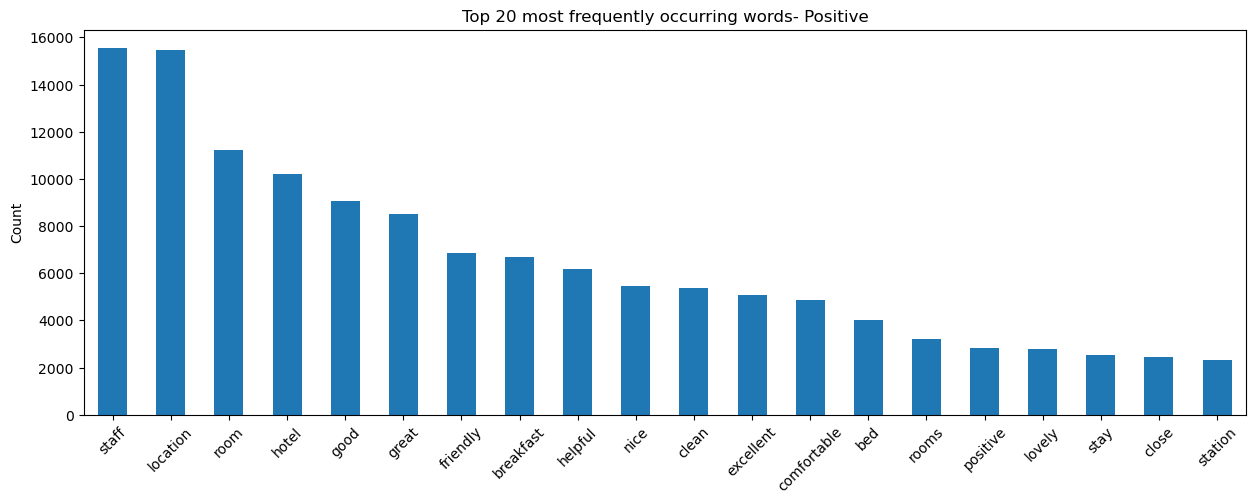

In [67]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words- Positive")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [68]:
bagofwords = CountVectorizer(stop_words="english", min_df=20)
bagofwords.fit(X_train['Negative_Review'])

X_train_transformed = bagofwords.transform(X_train['Negative_Review']) 

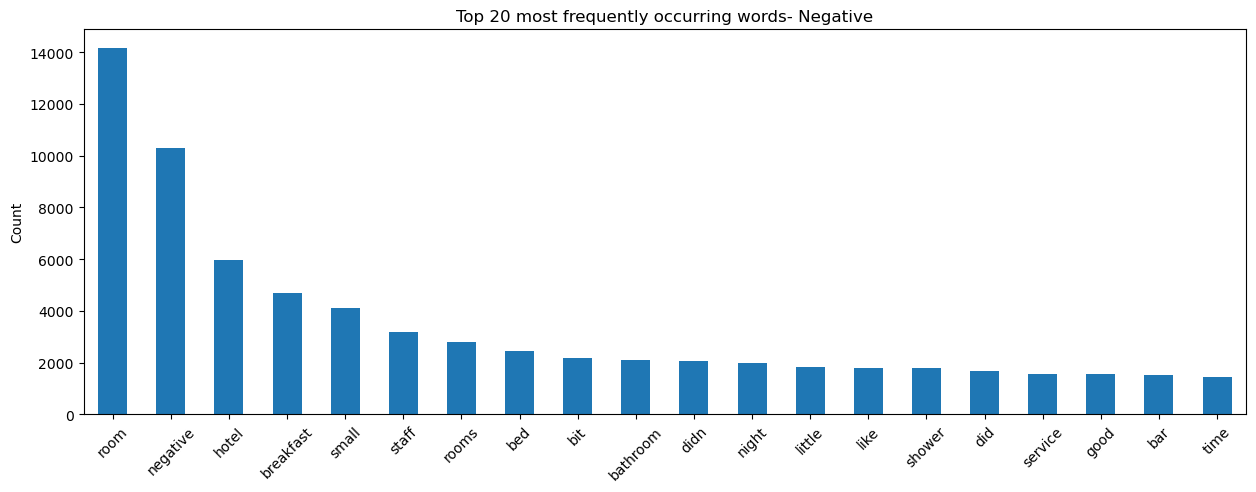

In [69]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words- Negative")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

As expected, there are positive words such as good, great, friendly, nice, clean, excellent and some mentions to staff and location in the positive reviews.

On the other hand, negative words such as small, little, negative are included in the negative reviews. It seems that the top 20 positive words are more indicative than the negative words.

Now that the `min_df` parameter has been obtained, in the final step, the positive and negative matrices can be obtained and will be joined to the numeric matrix. 

**Note:**
It should be ensured that the vectorization is done separately on the training and testing data to avoid data leakage.

In [70]:
# Instantiate
positive_vectorizer = CountVectorizer(stop_words="english", min_df=20)
negative_vectorizer = CountVectorizer(stop_words="english", min_df=20)

In [71]:
# Fit the CountVectorizer
positive_train_matrix = positive_vectorizer.fit_transform(X_train['Positive_Review'])
negative_train_matrix = negative_vectorizer.fit_transform(X_train['Negative_Review'])

In [72]:
# Transform
positive_test_matrix = positive_vectorizer.transform(X_test['Positive_Review'])
negative_test_matrix = negative_vectorizer.transform(X_test['Negative_Review'])

Convert the numeric data into a sparse matrix for both train and test data:

In [73]:
numeric_train_matrix = sparse.csr_matrix(X_train.drop(['Positive_Review', 'Negative_Review'], axis=1).values)
numeric_test_matrix = sparse.csr_matrix(X_test.drop(['Positive_Review', 'Negative_Review'], axis=1).values)

Combine the numeric_train_matrix, positive_train_matrix, and negative_train_matrix using hstack:

In [74]:
train_combined_matrix = hstack([numeric_train_matrix, positive_train_matrix, negative_train_matrix])

Combine the numeric_test_matrix, positive_test_matrix, and negative_test_matrix using hstack:

In [75]:
test_combined_matrix = hstack([numeric_test_matrix, positive_test_matrix, negative_test_matrix])

In [76]:
train_combined_matrix

<41216x3419 sparse matrix of type '<class 'numpy.float64'>'
	with 1170646 stored elements in Compressed Sparse Row format>

In [77]:
test_combined_matrix

<10305x3419 sparse matrix of type '<class 'numpy.float64'>'
	with 291766 stored elements in Compressed Sparse Row format>

The train and test combined matrices have the same rows as X_train and X_test but with the total columns of positive, negative and numerical matrices.

### Question 3.e.
What does the min_df parameter do?

The `min_df` parameter exclude any token that oocurs in less than `min_df` documents. This help us reducing the number of columns in the final matrix by removing infrequent words which occur in a small number of documents only. 

By setting an appropriate min_df value, we can filter out terms that are too infrequent and may not contribute much to the overall understanding of the text data. This can help reduce the size of the vocabulary and potentially improve the efficiency and effectiveness modelling approaches such as classification or clustering.